In [ ]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
dados<- read.table(file = "/content/sample_data/dados_credito_alemanha.txt", header = TRUE)
head(dados)

,A11,X6,A34,A43,X1169,A65,A75,X4,A93,A101,⋯,A121,X67,A143,A152,X2,A173,X1,A192,A201,X1.1
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,⋯,A122,53,A143,A152,1,A173,1,A191,A201,1


In [ ]:
## Trabalhando com a variável resposta
#
table(dados[,21])
for (i in 1:nrow(dados)){
	if (dados[i,21]==1) dados[i,21]<-1 else dados[i,21]<-0}
table(dados[,21])
#


  0   1 
300 699 


  0   1 
300 699 

historico
A30 A31 A32 A33 A34 
 40  49 530  88 292 

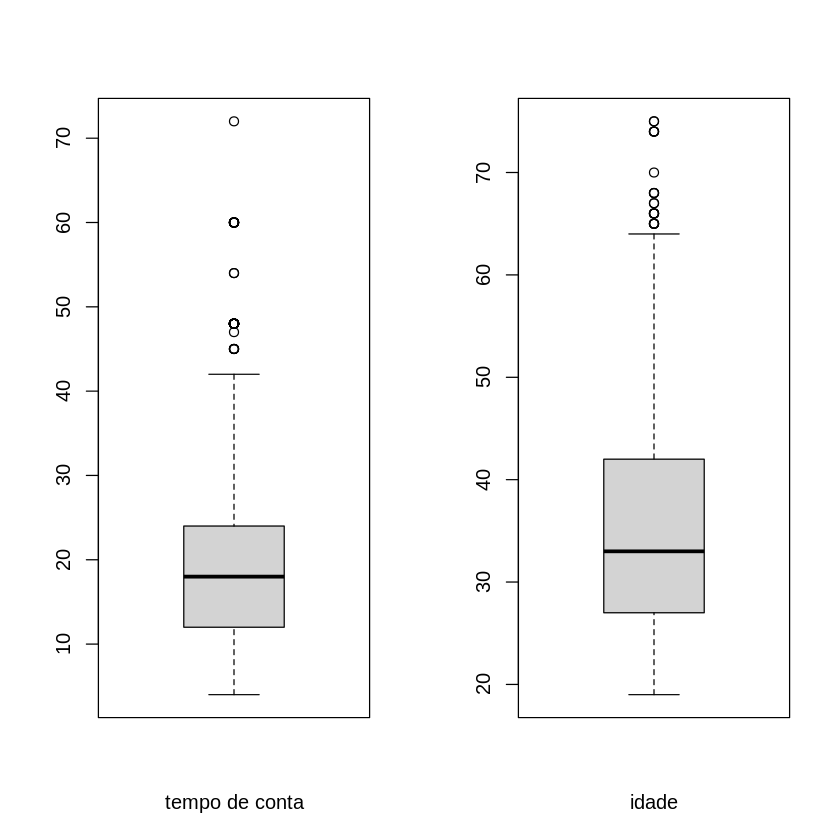

In [ ]:
# para simplificar aqui na aula usaremos com variáveis preditoras apenas tempo de conta, idade e histórico de crédito
tempo<-dados[,2]
idade<-dados[,13]
historico<-dados[,3]
par(mfrow=c(1,2))
boxplot(tempo,xlab="tempo de conta")
boxplot(idade, xlab="idade")
table(historico) # aqui poderíamos juntar as classes A30 com A31 porque são pouco frequentes e muito parecidas em definição, mas vou manter separadas. Se tivermos algum problema na estimação, voltamos e juntamos
#

In [ ]:
dadosf<-dados[,c(2,3,13,21)]
str(dadosf)
# para a variável qualitativa histórico de crédito com 5 categorias, vamos criar 4 dummies

'data.frame':	999 obs. of  4 variables:
 $ X6  : int  48 12 42 24 36 24 36 12 30 12 ...
 $ A34 : chr  "A32" "A34" "A32" "A33" ...
 $ X67 : int  22 49 45 53 35 53 35 61 28 25 ...
 $ X1.1: num  0 1 1 0 1 1 1 1 0 0 ...


In [ ]:
X_3<-model.matrix(dadosf[,4] ~ factor(dadosf[,2]))[,-1] #categoria A30 virou referência
X_3[1:10,]
Y<-dadosf[,4]
head(Y)
X<-cbind(dadosf[,c(1,3)],X_3)
colnames(X)<-c("Tempo", "Idade", "A31","A32","A33","A34")
head(X)
#

,"factor(dadosf[, 2])A31","factor(dadosf[, 2])A32","factor(dadosf[, 2])A33","factor(dadosf[, 2])A34"
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,0,0,1
10,0,1,0,0


[1] 0 1 1 0 1 1

,Tempo,Idade,A31,A32,A33,A34
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,48,22,0,1,0,0
2,12,49,0,0,0,1
3,42,45,0,1,0,0
4,24,53,0,0,1,0
5,36,35,0,1,0,0
6,24,53,0,1,0,0


In [ ]:
#### ajustando uma modelo de regressão logística
#
modlin<-glm(Y~.,data=X,family=binomial(link="logit")) #se trocar binomial por gaussian temos o modelo linear de regressão. Se escolhermos poisson temos a regressão Poisson



Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = X)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1520  -1.1015   0.6502   0.8265   1.7987  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.052792   0.437781  -0.121  0.90402    
Tempo       -0.035197   0.005989  -5.877 4.17e-09 ***
Idade        0.014280   0.006881   2.075  0.03796 *  
A31          0.027885   0.448130   0.062  0.95038    
A32          1.066504   0.350109   3.046  0.00232 ** 
A33          1.258174   0.409945   3.069  0.00215 ** 
A34          1.829894   0.371947   4.920 8.66e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1221.0  on 998  degrees of freedom
Residual deviance: 1120.6  on 992  degrees of freedom
AIC: 1134.6

Number of Fisher Scoring iterations: 4


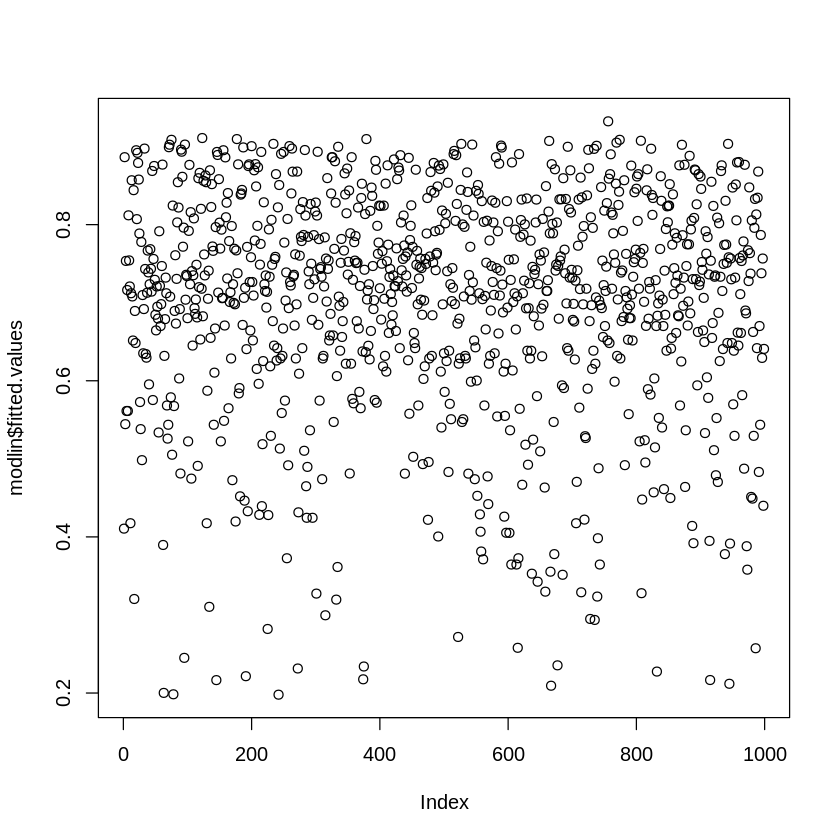

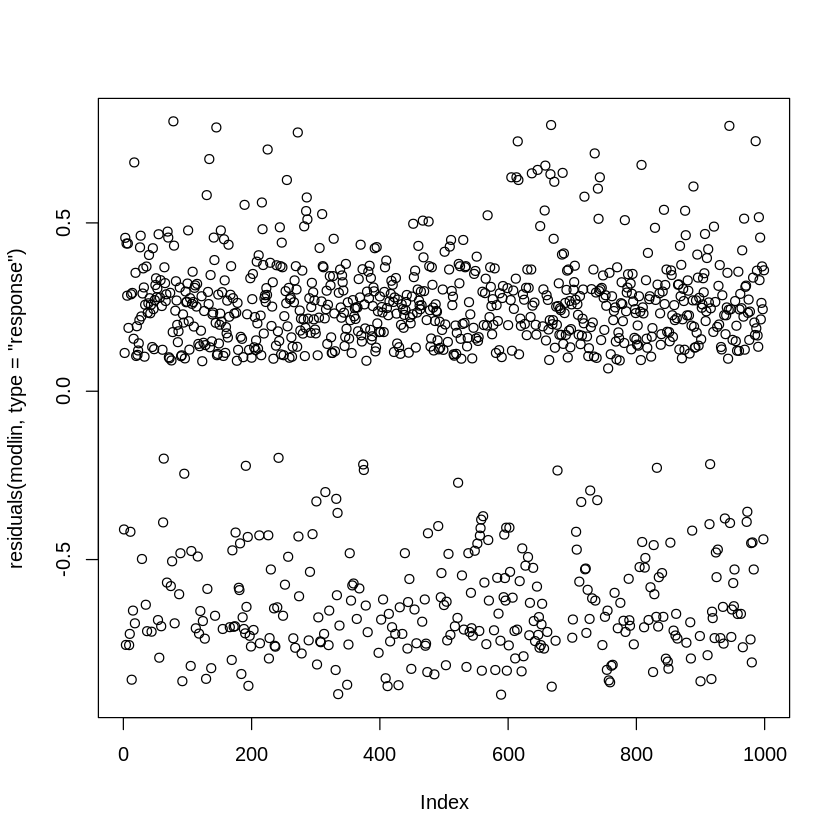

In [ ]:
# ou modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6],family=binomial(link="logit"))
summary(modlin)
plot(modlin$fitted.values)
plot(residuals(modlin,type='response')) # resíduos ordinários
# modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6]-1,family=binomial(link="logit")) # fazendo beta_0=0, no caso dele ser não significativo ou se fizer sentido prático que ele seja igual a zero
#

In [ ]:
# resíduos ordinários
modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6]-1,family=binomial(link="logit")) # fazendo beta_0=0, no caso dele ser não significativo ou se fizer sentido prático que ele seja igual a zero
#

In [ ]:
#### análise de diagnóstico
#
res.pear<-residuals(modlin,type='pearson')


In [ ]:
# a função modlin$residuals traz os resíduos chamados de working resíduos que é a diferença entre os valores observados e o preditor linear, que não vamos usar aqui
des.res<-residuals(modlin,type='deviance') # desvio residual
#

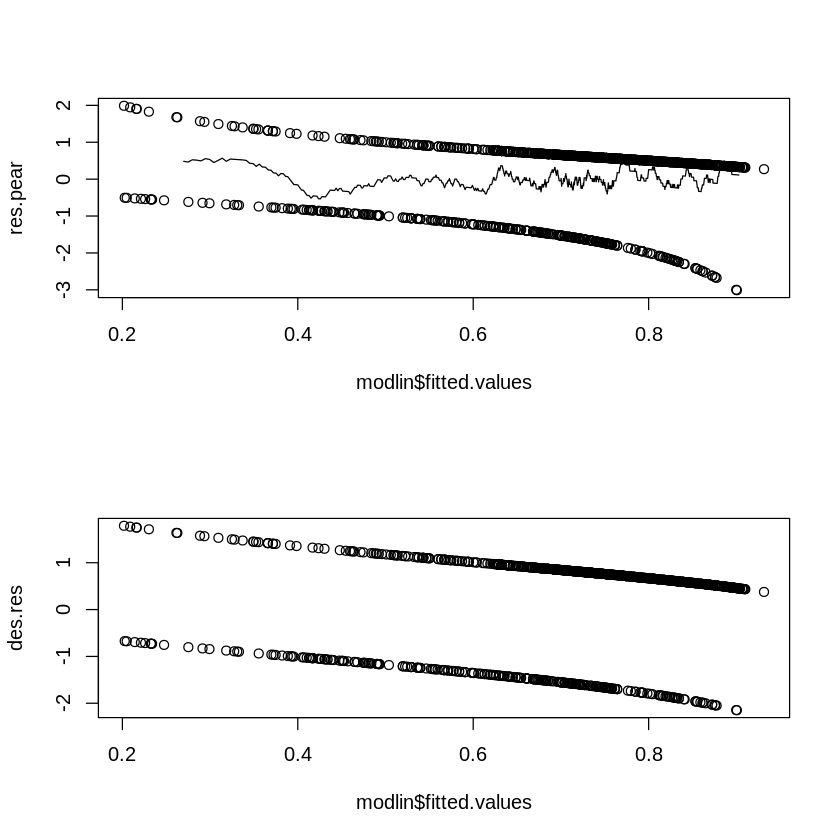

In [ ]:
res_pred<-cbind(modlin$fitted.values,res.pear)
res_pred<-res_pred[order(modlin$fitted.values),]
res.med.mov<-NULL
pred.med.mov<-NULL
cont<-1
jan<-30
for (i in 1:(length(res.pear)-jan)){
	res.med.mov[cont]<-mean(res_pred[i:(i+jan),2])
	pred.med.mov[cont]<-mean(res_pred[i:(i+jan),1])	
	cont<-cont+1}
par(mfrow=c(2,1))
plot(modlin$fitted.values,res.pear)
lines(pred.med.mov,res.med.mov)
plot(modlin$fitted.values,des.res)
#

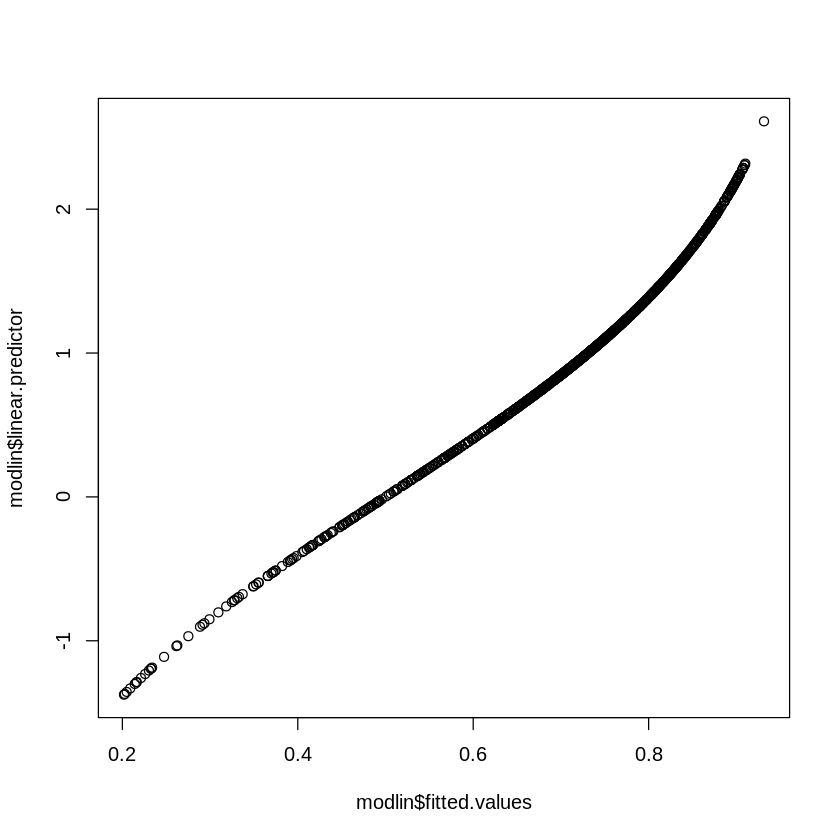

In [ ]:
plot(modlin$fitted.values,modlin$linear.predictor)
#
### taxa correta de classificação
#

[1] 0.4968603

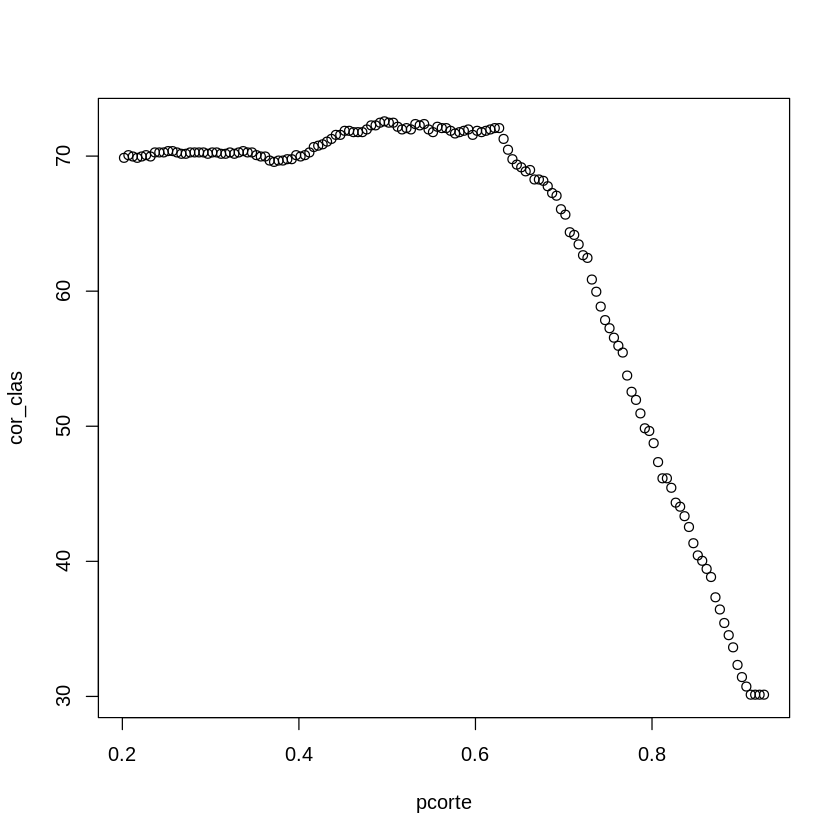

In [ ]:
cor_clas<-NULL
pcorte<-seq(from=min(modlin$fitted.values),to=max(modlin$fitted.values),by=0.005)
for (i in 1:length(pcorte)){
	classif<-ifelse(modlin$fitted.values>pcorte[i],1,0)
	cor_clas[i]<-(table(Y,classif)[1,1]+table(Y,classif)[2,2])/nrow(X)*100}
plot(pcorte,cor_clas)
pcorte[cor_clas==max(cor_clas)]
#

In [ ]:
classif<-ifelse(modlin$fitted.values>pcorte[cor_clas==max(cor_clas)],1,0)
table(classif,Y)
#

       Y
classif   0   1
      0  68  42
      1 232 657

[1] 0.7668603

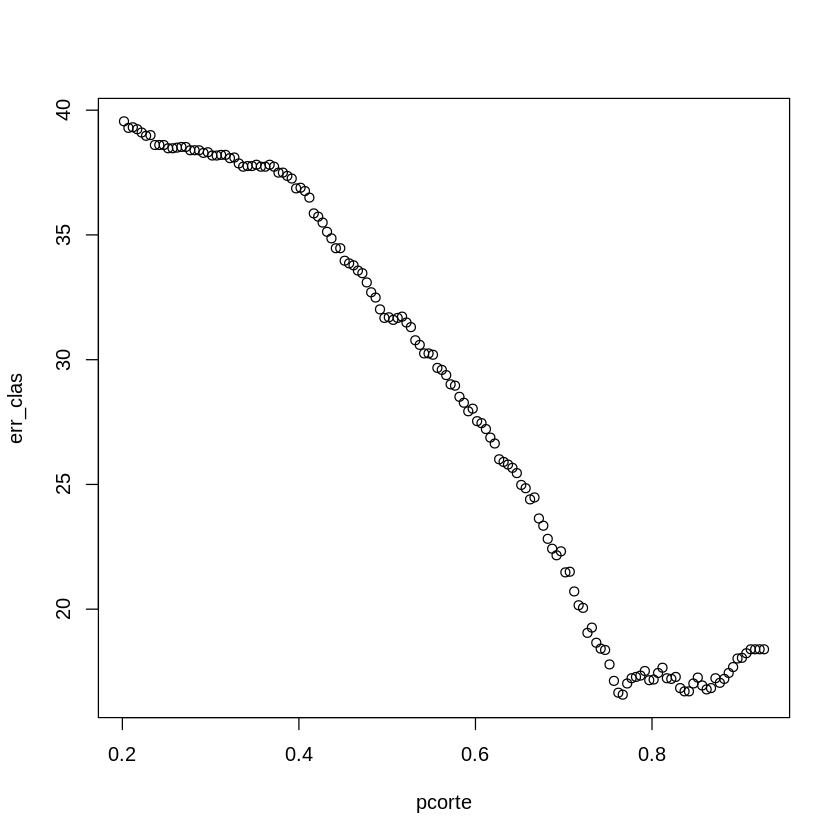

In [ ]:
# dando custo 5 para classificações erradas de maus clientes e custo 1 para classificações erradas de bons clientes
err_clas<-NULL
pcorte<-seq(from=min(modlin$fitted.values),to=max(modlin$fitted.values),by=0.005)
for (i in 1:length(pcorte)){
	classif<-ifelse(modlin$fitted.values>pcorte[i],1,0)
	err_clas[i]<-(table(Y,classif)[1,2]+(1/5)*table(Y,classif)[2,1])/((1/5)*sum(Y==0)+sum(Y==1))*100}
plot(pcorte,err_clas)
pcorte[err_clas==min(err_clas)]
#

In [ ]:
classif<-ifelse(modlin$fitted.values>pcorte[err_clas==min(err_clas)],1,0)
table(classif,Y)
#
# existe um pacote no R chamado cutoff que utiliza outro método para decisão do ponto de corte
#

       Y
classif   0   1
      0 254 399
      1  46 300

In [ ]:
##### Seleção de variáveis
#
## Usando stepwise por AIC
#
step(modlin, direction="both") # como A31 foi excluída, a categoria que junta A30 e A31 virou referência no modelo
modlin<-glm(Y~X[,1]+X[,2]+X[,4]+X[,5]+X[,6],family=binomial(link="logit"))
summary(modlin)
#

Start:  AIC=1132.62
Y ~ X[, 1] + X[, 2] + X[, 3] + X[, 4] + X[, 5] + X[, 6] - 1

         Df Deviance    AIC
- X[, 3]  1   1120.6 1130.6
<none>        1120.6 1132.6
- X[, 2]  1   1126.4 1136.4
- X[, 5]  1   1135.5 1145.5
- X[, 4]  1   1143.3 1153.3
- X[, 1]  1   1162.6 1172.6
- X[, 6]  1   1168.0 1178.0

Step:  AIC=1130.62
Y ~ X[, 1] + X[, 2] + X[, 4] + X[, 5] + X[, 6] - 1

         Df Deviance    AIC
<none>        1120.6 1130.6
+ X[, 3]  1   1120.6 1132.6
- X[, 2]  1   1128.2 1136.2
- X[, 5]  1   1138.6 1146.6
- X[, 4]  1   1152.2 1160.2
- X[, 1]  1   1164.4 1172.4
- X[, 6]  1   1183.0 1191.0



Call:  glm(formula = Y ~ X[, 1] + X[, 2] + X[, 4] + X[, 5] + X[, 6] - 
    1, family = binomial(link = "logit"))

Coefficients:
  X[, 1]    X[, 2]    X[, 4]    X[, 5]    X[, 6]  
-0.03546   0.01381   1.03491   1.22947   1.80040  

Degrees of Freedom: 999 Total (i.e. Null);  994 Residual
Null Deviance:	    1385 
Residual Deviance: 1121 	AIC: 1131


Call:
glm(formula = Y ~ X[, 1] + X[, 2] + X[, 4] + X[, 5] + X[, 6], 
    family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1522  -1.1046   0.6502   0.8265   1.7920  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.037018   0.356750  -0.104 0.917357    
X[, 1]      -0.035219   0.005978  -5.892 3.82e-09 ***
X[, 2]       0.014292   0.006878   2.078 0.037720 *  
X[, 4]       1.050791   0.242179   4.339 1.43e-05 ***
X[, 5]       1.242575   0.324102   3.834 0.000126 ***
X[, 6]       1.814155   0.272411   6.660 2.75e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1221.0  on 998  degrees of freedom
Residual deviance: 1120.6  on 993  degrees of freedom
AIC: 1132.6

Number of Fisher Scoring iterations: 4


In [ ]:
install.packages("glmnet") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




Loading required package: Matrix

Loaded glmnet 4.1-2



7 x 1 sparse Matrix of class "dgCMatrix"
                     s0
(Intercept)  0.11372035
Tempo       -0.03473999
Idade        0.01359112
A31         -0.09819244
A32          0.90684907
A33          1.08225810
A34          1.66338708

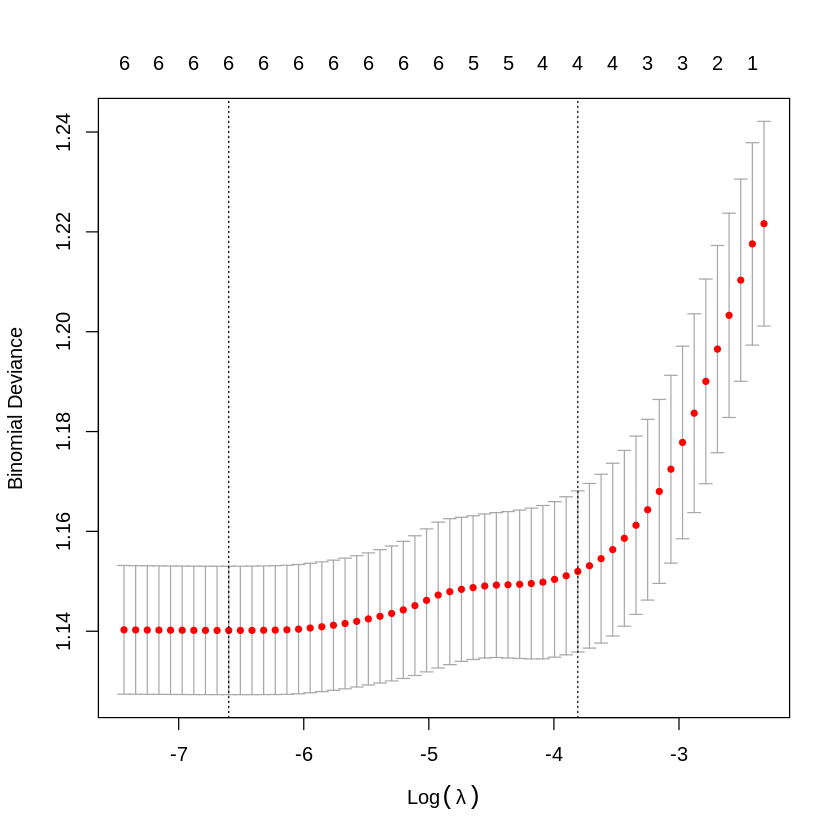

In [ ]:
## Seleção de variáveis via Lasso
#
library(glmnet)
set.seed(100)
matX<-data.matrix(X)
cv.out<-cv.glmnet(matX,Y,alpha=1,nfolds=5,family="binomial") #alpha=1 representa o lasso, alpha=0 representa o ridge e alpha entre 0 e 1 representa o elasticnet
plot(cv.out)
bestlam<-cv.out$lambda.min
modlasso<-glmnet(matX,Y,alpha=1,lambda=bestlam,family="binomial")
coef(modlasso)
#

7 x 1 sparse Matrix of class "dgCMatrix"
                     s0
(Intercept)  0.41848062
Tempo       -0.03409930
Idade        0.01373496
A31         -0.43076167
A32          0.57693019
A33          0.74352584
A34          1.29054728

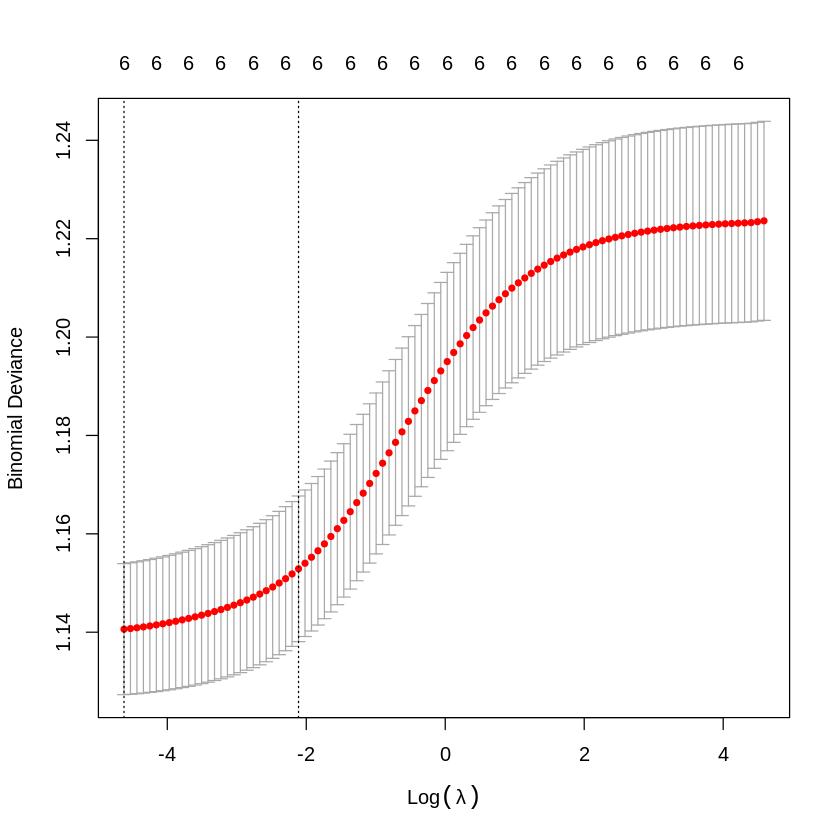

In [ ]:
## Seleção de variáveis via Ridge
#
set.seed(100)
cv.out<-cv.glmnet(matX,Y,alpha=0,nfolds=5,family="binomial") #alpha=1 representa o lasso, alpha=0 representa o ridge e alpha entre 0 e 1 representa o elasticnet
plot(cv.out)
bestlam<-cv.out$lambda.min
modridge<-glmnet(matX,Y,alpha=0,lambda=bestlam,family="binomial")
coef(modridge)
#